In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

#boston 데이터 세트 로드
boston = load_boston()

#boston 데이터 세트 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

#boston 데이터 세트의 target 배열은 주택 가격, 이를 PRICE 칼럼으로 DF에 추가 
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 : ', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


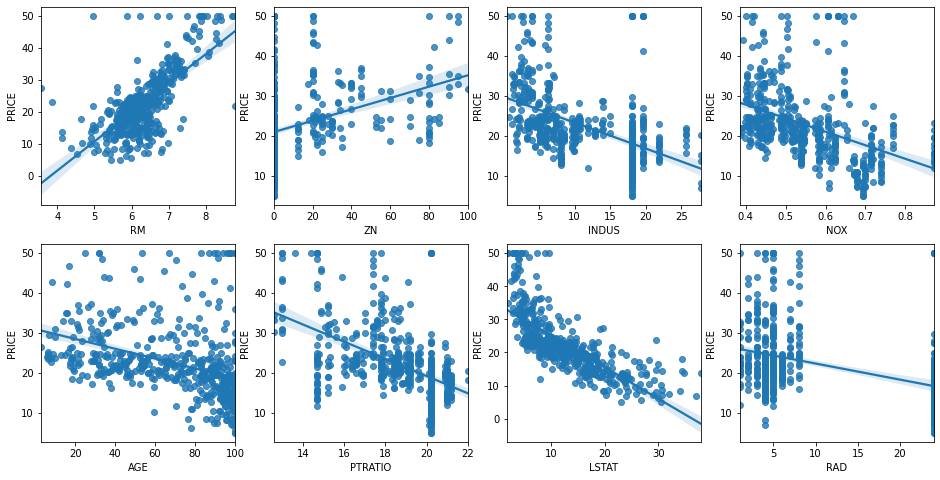

In [10]:
#2개의 행과 4개의 열을 가진 subplots 이용 axs는 4X2개의 ax를 가짐 
fig, axs=  plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i% 4
    #시본의 regplot을 이용해 산점도와 선형회귀 직선을 함꼐 표현
    sns.regplot(x=feature, y = 'PRICE', data = bostonDF, ax=axs[row][col])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis= 1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

#선형 회귀 OLS로 학습 / 예측 / 평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.306, RMSE : 4.160
Variance score : 0.757


In [12]:
print('절편 값 : ', lr.intercept_)
print('회귀 계수 값 : ', np.round(lr.coef_ , 1))

절편 값 :  40.995595172164556
회귀 계수 값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [13]:
#회귀 계수를 큰 값 순으로 정렬하기 위해 Series 로 생성.인덱스 칼럼명에 유의
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [14]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)
lr = LinearRegression()

#cross_val_score() 로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores= cross_val_score(lr, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5folds 의 개별 Negative MSE scores :  [-12.48 -26.1  -33.12 -80.83 -33.58]
5folds 의 개별 RMSE scores :  [3.53 5.11 5.75 8.99 5.8 ]
5folds 의 평균 RMSE : 5.836


In [15]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import LinearRegression

#다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

#degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 반환 
poly= PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처 : \n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [16]:
def polynomial_func(X):
    y = 1 + 2 *X[:,0] + 3 *X[:,0]**2 + 4 *X[:,1] ** 3
    return y

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 features : \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값 : \n', y)

일차 단항식 계수 features : 
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : 
 [  5 125]


In [17]:
#3차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature : \n', poly_ftr)

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인 
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수 : \n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape : \n', model.coef_.shape)

3차 다항식 계수 feature : 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 : 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : 
 (10,)


In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3* X[:, 0]**2 + 4*X[:, 1]**3
    return y

#Pipeline 객체로 Streamline 하게 Polynomial Feature 변환과 Linear Regression을 연결 
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])
X=np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [19]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환 .
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터 
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

#y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다. 
Degree 1 MSE는 0.40772896250986845 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다. 
Degree 4 MSE는 0.04320874987231741 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899340e+05 -1.87416086e+06  2.03716240e+07
 -1.44873341e+08  7.09315840e+08 -2.47066022e+09  6.24561781e+09
 -1.15676672e+10  1.56895187e+10 -1.54006300e+10  1.06457475e+10
 -4.91378589e+09  1.35919961e+09 -1.70381209e+08] 입니다. 
Degree 15 MSE는 182594790.078965 입니다.


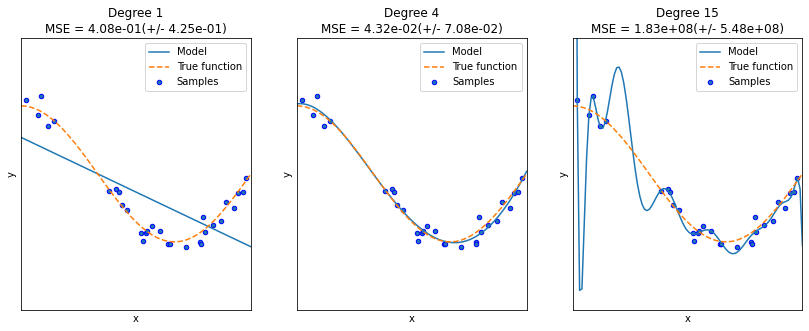

In [20]:
plt.figure(figsize = (14,5))
degrees = [1,4,15]

#다항 회귀의 차수(degree)를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    #개별 degree 별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    #교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring = "neg_mean_squared_error", cv = 10)
    #Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀 계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다. '.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    #0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    #테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    #예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    #실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1));plt.ylim((-2,2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#alpha = 10으로 설정해 릿지 회귀 수행.
ridge = Ridge(alpha = 10)
ndg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring= 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [23]:
print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores :  [-12.481 -26.096 -33.12  -80.833 -33.584]
5 folds의 개별 RMSE scores :  [3.533 5.108 5.755 8.991 5.795]
5 folds의 평균 RMSE : 5.836


In [25]:
#릿지에 사용될 alpha 파라미터의 값을 정의 
alphas = [0, 0.1, 1, 10, 100]

#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함 
for alpha in alphas : 
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용해 5폴드의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일때 5 folds의 평균 RMSE : 5.836
alpha 0.1 일때 5 folds의 평균 RMSE : 5.796
alpha 1 일때 5 folds의 평균 RMSE : 5.659
alpha 10 일때 5 folds의 평균 RMSE : 5.524
alpha 100 일때 5 folds의 평균 RMSE : 5.332


In [ ]:
#각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성 
fig, axs = plt.subplots(figsize = (18, 6), nrows = 1, ncols = 5)
#각 alpha에 따른 회귀계수 값을 데이터로 저장하기 위한 DataFrame 형성 
coeff_df = pd.DataFrame()

#alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장, pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    #alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가 
    coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
    colname = 'alpha:' + str(alpha)
    